# PLOT RESULTS

In [243]:
import os
import numpy as np
import re
from tools import *
import matplotlib.pyplot as plt


In [273]:
exp = 'fixed_synthetic_n_100_p_50_s_0.2'
#exp = 'fixed_synthetic'
#exp = 'higgs'
#exp = 'mnist'

In [245]:
def plot_experiment_simultaneous(datas, param_name, param_values, train_set_size=None, classification=True,
                                 zoom=None):

    fig, ax1 = plt.subplots(figsize=(14, 8))
    my_axes = []
    my_legends = []

    for data in datas:
        if len(data) == 6:
            train_set_size = data[5]
        nb_to_del_table = data[0] / train_set_size
        scores_regular_all = np.array(cut_list(data[1]))
        scores_screened_all = np.array(cut_list(data[2]))
        scores_r_all = np.array(cut_list(data[3]))
        safe_fraction = data[4] / train_set_size
        
        scores_regular_mean = np.mean(scores_regular_all, 0)
        scores_screened_mean = np.mean(scores_screened_all, 0)
        scores_r_mean = np.mean(scores_r_all, 0)

        scores_regular_var = np.sqrt(np.var(scores_regular_all, 0))
        scores_screened_var = np.sqrt(np.var(scores_screened_all, 0))
        scores_r_var = np.sqrt(np.var(scores_r_all, 0))
        my_axes.append(ax1.errorbar(nb_to_del_table[:len(scores_screened_mean)], scores_screened_mean, yerr=scores_screened_var, linewidth=5, capsize=10, 
                     markeredgewidth=5))
    
    #for k, my_axe in enumerate(my_axes):
       #ax1.legend(my_axe, "Trained on screened dataset ({} = {})".format(param_name, param_values[k]), prop={"size": 25})
    for param in param_values:
        my_legends.append("Trained on screened dataset ({} = {})".format(param_name, param))
    a = ax1.errorbar(nb_to_del_table[:len(scores_regular_mean)], scores_regular_mean, yerr=scores_regular_var, linewidth=5, capsize=10, 
                     markeredgewidth=5)
    b = ax1.errorbar(nb_to_del_table[:len(scores_regular_mean)], scores_r_mean, yerr=scores_r_var, linewidth=5, 
                     capsize=10, markeredgewidth=5)
    my_axes.extend([a,b])
    my_legends.extend(["Trained on whole dataset", "Trained on random subset"])
    ax1.legend(my_axes, my_legends, prop={"size": 25})
    
    if zoom !=None:
        ax1.set_ylim(zoom)
    
    ax1.set_xlabel('Fraction of points deleted (SAFE until {})'.format(safe_fraction), fontsize=45)
    if classification:
        ax1.set_ylabel('Accuracy on test set', fontsize=45)
    else:
        ax1.set_ylabel('R^2 score on test set', fontsize=45)
    ax1.tick_params('y', labelsize=30)
    ax1.tick_params('x', labelsize=30)
    fig.tight_layout()
    plt.show()
    return

In [246]:
def show_results(conds, zoom):
    exists=False
    for file in os.listdir('results/' + exp):
        filename = os.fsdecode(file)
        if all(cond in filename for cond in conds):
            print(filename)
            data = np.load('results/' + exp + '/' + filename)
            plot_experiment(data=data, zoom=zoom)
            exists=True
    if not exists:
        print('Sorry, the combination you asked is not in the results.')
    return

def show_results_simultaneous(conds, zoom, param_name, param_values):
    datas = []
    exists = False
    for file in os.listdir('results/' + exp):
        filename = os.fsdecode(file)
        if all(cond in filename for cond in conds):
            exists = True
            to_load_base = 'results/' + exp + '/' + filename
            print(to_load_base)
            for param in param_values:
                to_load = to_load_base.replace('{}_{}'.format(param_name, param_values[0]), '{}_{}'.format(param_name, param))
                print(param, to_load)
                datas.append(np.load(to_load))
            break
    if not exists:
        return 'Error, combination not found'
    plot_experiment_simultaneous(datas=datas, param_name=param_name, param_values=param_values, zoom=zoom)
    return

# Synthetic fixed

results/fixed_synthetic_n_100_p_50_s_0.2/X_size_100_sub_ell_0_loss_truncated_squared_lmbda_0.01_n_ellipsoid_1_intercept_False_mu_0.1_redundant_0_noise_0.1_better_init_0_better_radius_10.0_cut_ell_False_clip_ell_False.npy
1 results/fixed_synthetic_n_100_p_50_s_0.2/X_size_100_sub_ell_0_loss_truncated_squared_lmbda_0.01_n_ellipsoid_1_intercept_False_mu_0.1_redundant_0_noise_0.1_better_init_0_better_radius_10.0_cut_ell_False_clip_ell_False.npy
10 results/fixed_synthetic_n_100_p_50_s_0.2/X_size_100_sub_ell_0_loss_truncated_squared_lmbda_0.01_n_ellipsoid_10_intercept_False_mu_0.1_redundant_0_noise_0.1_better_init_0_better_radius_10.0_cut_ell_False_clip_ell_False.npy
100 results/fixed_synthetic_n_100_p_50_s_0.2/X_size_100_sub_ell_0_loss_truncated_squared_lmbda_0.01_n_ellipsoid_100_intercept_False_mu_0.1_redundant_0_noise_0.1_better_init_0_better_radius_10.0_cut_ell_False_clip_ell_False.npy


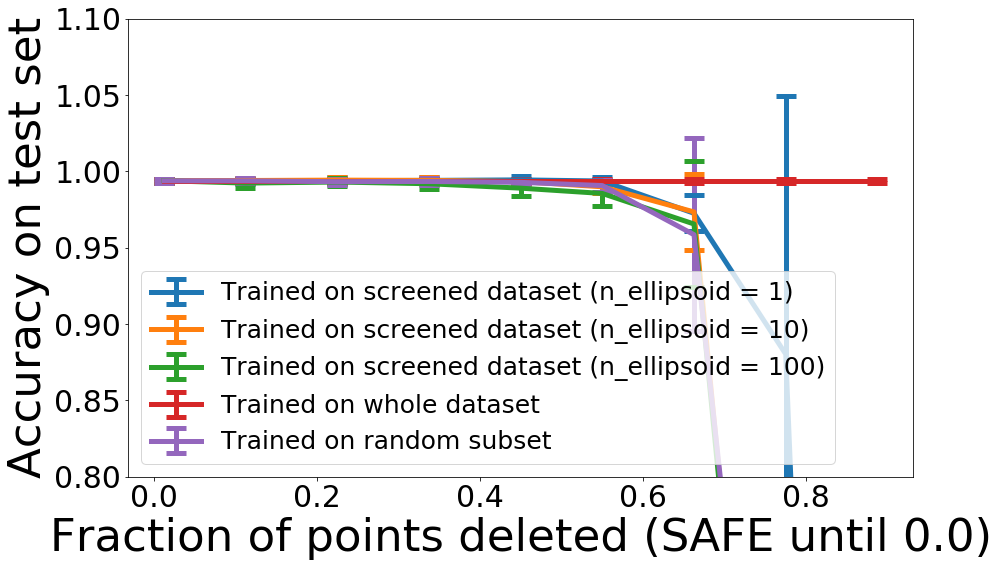

In [282]:
param = False
if param:
    conds = ['X_size_100', 'sub_ell_0', 'n_ellipsoid_100_', 'loss_truncated_squared', 'lmbda_0.01', 'mu_0.0_',
            'better_init_0', 'better_radius_10.0_']
    param_name = 'mu'
    param_values = [0.0, 0.001, 0.01, 0.1, 1.0, 10.0]
else:
    conds = ['X_size_100', 'sub_ell_0', 'n_ellipsoid_1_', 'loss_truncated_squared', 'lmbda_0.01', 'mu_0.1_',
            'better_init_0', 'better_radius_10.0_']
    param_name = 'n_ellipsoid'
    param_values = [1, 10, 100]
    
zoom = (0.8, 1.1)
show_results_simultaneous(conds, zoom, param_name, param_values)
#show_results(conds, zoom)

# MNIST

X_size_60000_sub_ell_0_loss_squared_hinge_lmbda_0.01_n_ellipsoid_1000_intercept_False_mu_1.0_redundant_0_noise_0.1_better_init_0_better_radius_0.0_cut_ell_False_clip_ell_False.npy


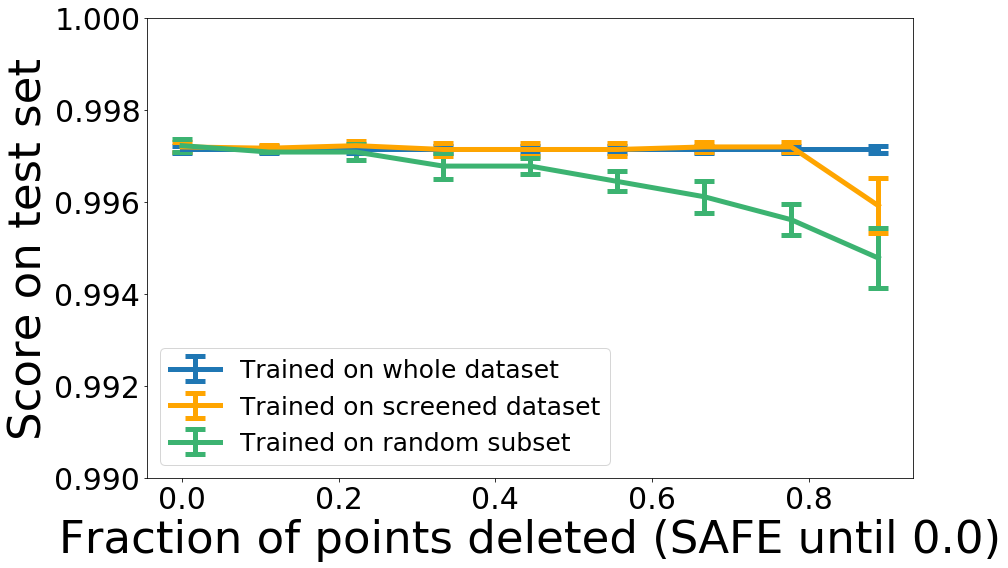

In [153]:
conds = ['X_size_60000', 'n_ellipsoid_1000_', 'loss_squared_hinge', 'lmbda_0.001', 'mu_1.0_',
            'better_init_0', 'better_radius_0.0_']
zoom = (0.99, 1)
show_results(conds, zoom)

# Higgs

X_size_1000000_sub_ell_0_loss_squared_hinge_lmbda_0.001_n_ellipsoid_10000_intercept_False_mu_1.0_redundant_0_noise_0.1_better_init_0_better_radius_10.0_cut_ell_False_clip_ell_False.npy
6 [ array([     1,  88889, 177778, 266667, 355556, 444444, 533333, 622222,
       711111, 800000])
 list([[0.64048, 0.64048, 0.64048, 0.64048, 0.64048, 0.64048, 0.64048, 0.64048, 0.64048], [0.639745, 0.639745, 0.639745, 0.639745, 0.639745, 0.639745, 0.639745, 0.639745, 0.639745], [0.639495, 0.639495, 0.639495, 0.639495, 0.639495, 0.639495, 0.639495, 0.639495, 0.639495]])
 list([[0.64048, 0.64029, 0.38667500000000005, 0.368215, 0.364625, 0.361615, 0.35932000000000003, 0.35938, 0.359305], [0.63975, 0.638495, 0.38808, 0.37040500000000004, 0.36606500000000003, 0.36281, 0.360095, 0.36005, 0.36014000000000007], [0.63949, 0.63854, 0.38769500000000007, 0.37012, 0.36615, 0.36281500000000005, 0.36030500000000004, 0.36039, 0.360385]])
 list([[0.64048, 0.640205, 0.64013, 0.640525, 0.640245, 0.640225, 0.640575, 0.640

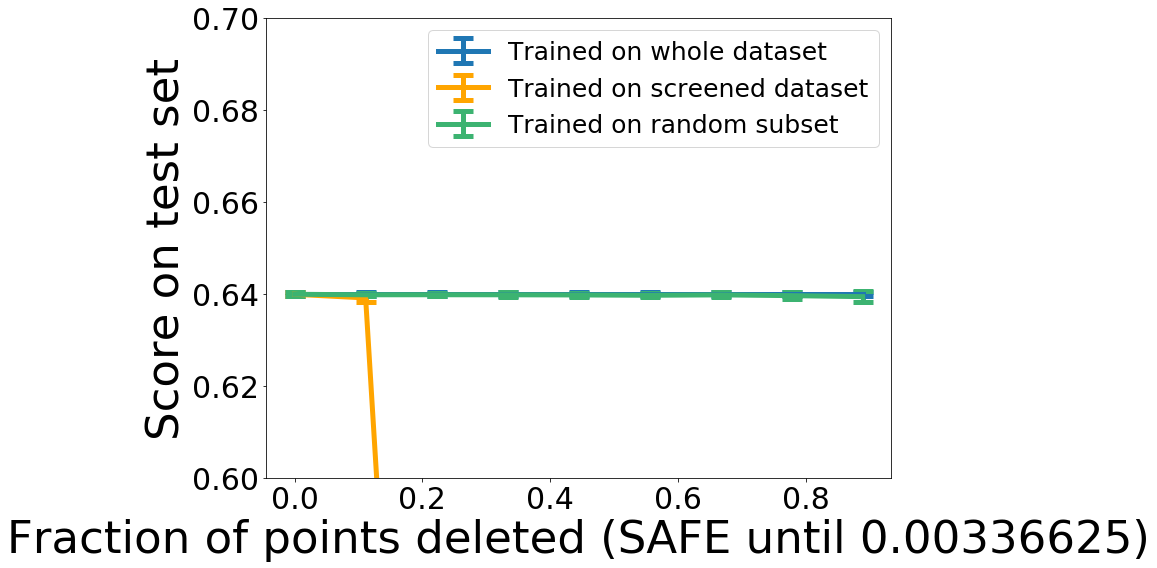

In [241]:
conds = ['X_size_1000000', 'n_ellipsoid_10000_', 'loss_squared_hinge', 'lmbda_0.001', 'mu_1.0_',
            'better_init_0', 'better_radius_10.0_']
zoom = (0.6, 0.7)
show_results(conds, zoom)